# 1. Importing the Libraries 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


# 2. Initial Conditions

In [29]:
m1 = 1
m2 = 1
m3 = 1

#positions
initial_pos_1 = [1.0,0.0,1.0]
initial_pos_2 = [1.0,1.0,0.0]
initial_pos_3 = [0.0,1.0,1.0]

#velocity
initial_velocity_1 = [0.0,0.0,-1.0]
initial_velocity_2 = [0.0,0.0,1.0]
initial_velocity_3 = [0.0,0.0,-0.6]

initial_cond = np.array([
    initial_pos_1,initial_pos_2,initial_pos_3,
    initial_velocity_1,initial_velocity_2,initial_velocity_3
]).ravel() #2D mathi 1D ma convert kri dye, bcz y0 vadi arg ma 1D array j hovo joye

# print(initial_cond).ravel()

# 3. Define system of first order ODEs

In [25]:
def system_odes(t,sol, m1, m2, m3):
    # print(sol)
    
    p1,p2,p3 = sol[0:3], sol[3:6], sol[6:9]
    dp1_dt, dp2_dt, dp3_dt = sol[9:12], sol[12:15], sol[15:18]
    
    f1,f2,f3 = dp1_dt, dp2_dt, dp3_dt
    
    df1_dt = m2*(p2-p1)/np.linalg.norm(p2-p1)**3 + m3*(p3-p1)/np.linalg.norm(p3-p1)**3
    df2_dt = m3*(p3-p2)/np.linalg.norm(p3-p2)**3 + m1*(p1-p2)/np.linalg.norm(p1-p2)**3
    df3_dt = m1*(p1-p3)/np.linalg.norm(p1-p3)**3 + m2*(p2-p3)/np.linalg.norm(p2-p3)**3
    
    return np.array([f1,f2,f3,df1_dt,df2_dt,df3_dt]).ravel()

# 4. Solve numeric

In [36]:
time_s , time_e = 0, 10
t_points = np.linspace(time_s, time_e, 1001)

solution = solve_ivp(fun=system_odes, t_span=(time_s,time_e), y0=initial_cond, t_eval=t_points, args=(m1, m2, m3))

# t_sol = solution.t

p1X_sol = solution.y[0]
p1Y_sol = solution.y[1]
p1Z_sol = solution.y[2]

p2X_sol = solution.y[3]
p2Y_sol = solution.y[4]
p2Z_sol = solution.y[5]

p3X_sol = solution.y[6]
p3Y_sol = solution.y[7]
p3Z_sol = solution.y[8]

# 5. Plot

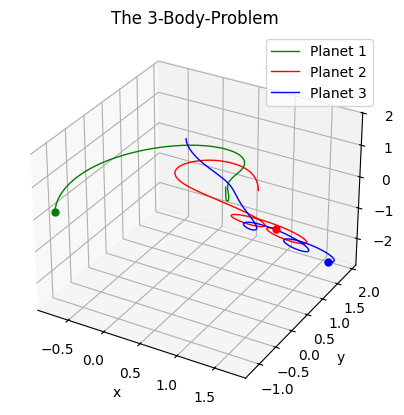

In [37]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

# trajectory mate
planet1_plt, = ax.plot(p1X_sol, p1Y_sol, p1Z_sol, 'green', label='Planet 1', linewidth=1)
planet2_plt, = ax.plot(p2X_sol, p2Y_sol, p2Z_sol, 'red', label='Planet 2', linewidth=1)
planet3_plt, = ax.plot(p3X_sol, p3Y_sol, p3Z_sol, 'blue', label='Planet 3', linewidth=1)

#planets mate
planet1_dot, = ax.plot([p1X_sol[-1]], [p1Y_sol[-1]], [p1Z_sol[-1]], "o", color='green', markersize=5)
planet2_dot, = ax.plot([p2X_sol[-1]], [p2Y_sol[-1]], [p2Z_sol[-1]], "o", color='red', markersize=5)
planet3_dot, = ax.plot([p3X_sol[-1]], [p3Y_sol[-1]], [p3Z_sol[-1]], "o", color='blue', markersize=5)

ax.set_title("The 3-Body-Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()